# SIT744 Assignment 2: Efficient Training of Convolutional Neural Network 

<div class="alert-info">
    <p>Due: <strong>9:00am 18 May 2020</strong>  (Monday)</p>

This is an <strong>individual</strong> assignment. It contributes <strong>40%</strong> to your final mark. Read the assignment instruction carefully.

<h2> What to submit </h2>

<p>
This assignment is to be completed individually and submitted to CloudDeakin. <strong>By the due date, you are required to submit the following files to the corresponding Assignment (Dropbox) in CloudDeakin</strong>:

<ol>
<li>	<strong>[YourID]_assignment2_solution.ipynp</strong>:  This is your Python notebook solution source file. </li>
<li>	<strong>[YourID]_assingment2_output.html</strong>: This is the output of your Python notebook solution <emph>exported</emph> in HTML format.</li>
<li>	Extra files needed to complete your assignment, if any (e.g., images used in your answers).</li>
</ol>
</p>

<p>
For example, if your student ID is: 123456, you will then need to submit the following files:
<ul>
<li> 123456_assignment2_solution.ipynp </li>
<li> 123456_assignment2_output.html</li>
</ul>
</p>

<h2> Warning </h2>

Some components of this assignment may involve heavy computation that runs for a long duration. Please start early to avoid missing the assignment due date.

<h2> Marking criteria </h2>

<p>
Your submission will be marked using the following criteria.

<ul>
<li> Showing good effort through completed tasks.</li>
<li> Applying deep learning theory to design suitable deep learning solutions for the tasks.</li>
<li> Critically evaluating and reflecting on the pros and cons of various design decisions.</li>
<li> Demonstrating creativity and resourcefulness in providing unique individual solutions.</li>
<li> Showing attention to details through a good quality assignment report.</li>
</ul>
</p>

<p>
Indicative weights of various tasks are provided, but the assignment will be marked by the overall quality per the above criteria.
</p>
</div>

## Assignment objective

This assignment is to feedback on your learning in deep learning theory and its application to  data analytics or artificial intelligence problems.  

It builds on Assignment 1 but requires a higher level of mastery of deep learning theory and programming/engineering skills. In particular, you will experience training a much deeper network on a large-scale dataset. You will encounter  practical issues that help you consolidate textbook learning. 

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.datasets import mnist
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, array_to_img
from keras.utils import to_categorical
from matplotlib import pyplot
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.callbacks import ReduceLROnPlateau
import math
import sys

%matplotlib inline

Using TensorFlow backend.


## Task 1 Solving Fashion-MNIST with Convolutional Neural Networks

*(weight ~20%)*

In Assignment 1, you tackled the image classification problem in Fashion-MNIST. There, you used a Densely Connected Neural Network. You should now know that is not an optimal model architecture for the problem. In Assignment 2, you will apply the best practices of deep-learning computer vision to improve the image classification performance.

### Task 1.1 Revisit Fashion-MNIST classification with DNN

*(weight ~3%)*

Review your Assignment 1 solution, and reproduce the experiment here. Try to improve the model without changing the model architecture.


In [0]:
#Loading the data

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [0]:
# Preprocessing the data

#Normalize the data dimensions so that they are of approximately the same scale.

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [0]:
#Making training, testing, and validation pipelines

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.batch(128)

test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))

val_dataset = tf.data.Dataset.from_tensor_slices((x_valid, y_valid))
val_dataset = val_dataset.batch(128)

In [5]:
#Improved Model by adding the learning rate scheduler and changing the model learning rate to 0.0001 and increased the epochs from 100 to 200

model = models.Sequential([
    keras.layers.Flatten(input_shape=(28,28,1)),
    keras.layers.Flatten(input_shape=(28,28,1)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

initial_learning_rate = 0.0001

lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)

optimizer = keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_dataset, epochs=200, batch_size=128,verbose=2)

Epoch 8/200
430/430 - 1s - loss: 0.4144 - accuracy: 0.8594
Epoch 9/200
430/430 - 1s - loss: 0.4047 - accuracy: 0.8623
Epoch 10/200
430/430 - 1s - loss: 0.3963 - accuracy: 0.8651
Epoch 11/200
430/430 - 1s - loss: 0.3888 - accuracy: 0.8675
Epoch 12/200
430/430 - 1s - loss: 0.3821 - accuracy: 0.8694
Epoch 13/200
430/430 - 1s - loss: 0.3761 - accuracy: 0.8715
Epoch 14/200
430/430 - 1s - loss: 0.3705 - accuracy: 0.8732
Epoch 15/200
430/430 - 1s - loss: 0.3653 - accuracy: 0.8752
Epoch 16/200
430/430 - 1s - loss: 0.3605 - accuracy: 0.8767
Epoch 17/200
430/430 - 1s - loss: 0.3560 - accuracy: 0.8782
Epoch 18/200
430/430 - 1s - loss: 0.3517 - accuracy: 0.8795
Epoch 19/200
430/430 - 1s - loss: 0.3476 - accuracy: 0.8807
Epoch 20/200
430/430 - 1s - loss: 0.3436 - accuracy: 0.8817
Epoch 21/200
430/430 - 1s - loss: 0.3399 - accuracy: 0.8828
Epoch 22/200
430/430 - 1s - loss: 0.3363 - accuracy: 0.8838
Epoch 23/200
430/430 - 1s - loss: 0.3328 - accuracy: 0.8845
Epoch 24/200
430/430 - 1s - loss: 0.3296 -

In [6]:
test_loss, test_acc = model.evaluate(x_test,y_test, verbose=2)

print('\nTest accuracy:', test_acc*100)

313/313 - 1s - loss: 0.3416 - accuracy: 0.8856

Test accuracy: 88.55999708175659


### Task 1.2 Train a ConvNet from scratch

*(weight ~5%)*

Build a ConvNet to replace the densely connected network in Task 1.1. Report the classification accuracy on the test set. Aim to achieve higher accuracy. 



In [8]:
#Building a ConvNet from scratch

model = models.Sequential()

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))

model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Looking at the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 5, 5, 128)         36992     
_________________________________________________________________
flatten_3 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)              

In [10]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=100,
         validation_data=(x_valid, y_valid))

Epoch 1/100
860/860 [==============================] - 3s 4ms/step - loss: 0.0771 - accuracy: 0.9710 - val_loss: 0.2850 - val_accuracy: 0.9220
Epoch 2/100
860/860 [==============================] - 3s 4ms/step - loss: 0.0657 - accuracy: 0.9755 - val_loss: 0.3022 - val_accuracy: 0.9194
Epoch 3/100
860/860 [==============================] - 3s 4ms/step - loss: 0.0539 - accuracy: 0.9794 - val_loss: 0.3201 - val_accuracy: 0.9160
Epoch 4/100
860/860 [==============================] - 3s 4ms/step - loss: 0.0457 - accuracy: 0.9831 - val_loss: 0.3733 - val_accuracy: 0.9208
Epoch 5/100
860/860 [==============================] - 3s 4ms/step - loss: 0.0422 - accuracy: 0.9847 - val_loss: 0.3586 - val_accuracy: 0.9226
Epoch 6/100
860/860 [==============================] - 3s 4ms/step - loss: 0.0350 - accuracy: 0.9874 - val_loss: 0.3879 - val_accuracy: 0.9236
Epoch 7/100
860/860 [==============================] - 3s 4ms/step - loss: 0.0318 - accuracy: 0.9881 - val_loss: 0.4062 - val_accuracy: 0.9226

In [12]:
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1]*100)


 Test accuracy: 91.430002450943


In [13]:
#Attempt to make the current cnn achieve better accuracy 

model = models.Sequential()

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(layers.Dropout(0.25))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Dropout(0.4))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 5, 5, 128)        

In [14]:
model.compile(loss='categorical_crossentropy',
             optimizer='Adam',
             metrics=['accuracy'])


model.fit(x_train,
         y_train,
         batch_size=128,
         epochs=100,
         validation_data=(x_valid, y_valid))

430/430 [==============================] - 2s 5ms/step - loss: 0.2588 - accuracy: 0.9039 - val_loss: 0.2203 - val_accuracy: 0.9188
Epoch 7/100
430/430 [==============================] - 2s 5ms/step - loss: 0.2506 - accuracy: 0.9081 - val_loss: 0.2164 - val_accuracy: 0.9184
Epoch 8/100
430/430 [==============================] - 2s 5ms/step - loss: 0.2375 - accuracy: 0.9118 - val_loss: 0.2035 - val_accuracy: 0.9242
Epoch 9/100
430/430 [==============================] - 2s 5ms/step - loss: 0.2287 - accuracy: 0.9146 - val_loss: 0.2197 - val_accuracy: 0.9182
Epoch 10/100
430/430 [==============================] - 2s 5ms/step - loss: 0.2195 - accuracy: 0.9171 - val_loss: 0.2009 - val_accuracy: 0.9268
Epoch 11/100
430/430 [==============================] - 2s 5ms/step - loss: 0.2101 - accuracy: 0.9219 - val_loss: 0.2000 - val_accuracy: 0.9268
Epoch 12/100
430/430 [==============================] - 2s 5ms/step - loss: 0.2092 - accuracy: 0.9219 - val_loss: 0.2002 - val_accuracy: 0.9284
Epoch 13

In [15]:
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1]*100)


 Test accuracy: 93.05999875068665



### Task 1.3 Build an input pipeline for data augmentation

*(weight ~5%)*

Build a data preprocessing pipeline to perform data augmentation. (You may use Keras ImageDataGenerator or write your own transformations.)

- Report the new classification accuracy. Make sure that you use the same number of training epochs as in Task 1.2.

- (Optional) Profile your input pipeline to identify the most time-consuming operation. What actions have you taken to address that slow operation? (*Hint: You may use the [TensorFlow Profiler](https://github.com/tensorflow/profiler).*)

In [0]:
#Building data preprocessing pipeline top perform data augmentation

batch_size = 128

train_datagen = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.5,
        zoom_range=(0.9, 1.1),
        horizontal_flip=False,
        vertical_flip=False, 
        fill_mode='constant',
        cval=0)
    
val_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()


In [0]:
train_datagen.fit(x_train)
#val_datagen.fit(x_valid)

In [0]:
num_train_batches = len(x_train) // batch_size
num_train_batches += (0 if len(x_train) % batch_size == 0 else 1)     
num_val_batches = len(x_valid) // batch_size
num_val_batches += (0 if len(x_valid) % batch_size == 0 else 1)     
num_test_batches = len(x_test) // batch_size
num_test_batches += (0 if len(x_test) % batch_size == 0 else 1)    

In [0]:
#pipelines for training, validation and test data

train_generator = train_datagen.flow(x_train, y_train, 
                                         batch_size=batch_size)

val_generator = train_datagen.flow(x_valid, y_valid, 
                                         batch_size=batch_size)

test_generator = test_datagen.flow(x_test, y_test, 
                                       batch_size=batch_size)


In [24]:
# Fitting the model after Data Augmentation

history = model.fit_generator(train_generator,
                                  steps_per_epoch = num_test_batches, 
                                  epochs = 100,
                                  validation_data = val_generator,
                                  shuffle=True,verbose = 1,validation_steps = num_val_batches)

Epoch 2/100
79/79 [==============================] - 3s 43ms/step - loss: 0.5777 - accuracy: 0.7915 - val_loss: 0.4295 - val_accuracy: 0.8418
Epoch 3/100
79/79 [==============================] - 3s 43ms/step - loss: 0.5258 - accuracy: 0.8040 - val_loss: 0.4342 - val_accuracy: 0.8458
Epoch 4/100
79/79 [==============================] - 3s 43ms/step - loss: 0.5245 - accuracy: 0.8099 - val_loss: 0.3819 - val_accuracy: 0.8684
Epoch 5/100
79/79 [==============================] - 3s 42ms/step - loss: 0.4905 - accuracy: 0.8247 - val_loss: 0.3774 - val_accuracy: 0.8634
Epoch 6/100
79/79 [==============================] - 3s 42ms/step - loss: 0.4733 - accuracy: 0.8277 - val_loss: 0.3790 - val_accuracy: 0.8592
Epoch 7/100
79/79 [==============================] - 3s 42ms/step - loss: 0.4517 - accuracy: 0.8330 - val_loss: 0.3486 - val_accuracy: 0.8682
Epoch 8/100
79/79 [==============================] - 3s 43ms/step - loss: 0.4619 - accuracy: 0.8313 - val_loss: 0.3651 - val_accuracy: 0.8650
Epoch 

In [26]:
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1]*100)


 Test accuracy: 91.75000190734863


### Task 1.3 Fashion-MNIST with transfer learning

*(weight ~5%)*

Use a pretrained model as the convolutional base to improve the classification performance. (Hint: You may use models in Keras Applications or those in the TensorFlow Hub.)

- Try both with fine-tuning and without fine-tuning.
- Report the model performance as before.



Note : I would be using the VGG16 pretrained model to classify the **fashion_mnist** dataser and then check it's accuracy


In [0]:
#I would be using the VGG16 pretrained model
#Have to load the data again as the preprocessing woiuld be different for the VGG19 model
#Taken help from https://www.kaggle.com/anandad/classify-fashion-mnist-with-vgg16

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

IMG_WIDTH = 48
IMG_HEIGHT = 48
IMG_DEPTH = 3
BATCH_SIZE = 16

In [33]:
#We had to convert the images into 3 channels

train_X=np.dstack([x_train] * 3)
test_X=np.dstack([x_test]*3)
train_X.shape,test_X.shape

((60000, 28, 84), (10000, 28, 84))

In [34]:
#Reshaping the images as the input required by the tensorflow

train_X = train_X.reshape(-1, 28,28,3)
test_X= test_X.reshape (-1,28,28,3)
train_X.shape,test_X.shape

((60000, 28, 28, 3), (10000, 28, 28, 3))

In [35]:
#VGG19 requires the size of the image to be 48*48

train_X = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in train_X])
test_X = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in test_X])
train_X.shape, test_X.shape

((60000, 48, 48, 3), (10000, 48, 48, 3))

In [0]:
#Normalising the data and changing their type to float

train_X = train_X / 255.
test_X = test_X / 255.
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')

In [37]:
# Converting Labels to one hot encoded format

train_Y_one_hot = to_categorical(y_train)
test_Y_one_hot = to_categorical(y_test)

train_X,valid_X,train_label,valid_label = train_test_split(train_X,
                                                           train_Y_one_hot,
                                                           test_size=0.2,
                                                           random_state=13
                                                           )
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 48, 48, 3), (12000, 48, 48, 3), (48000, 10), (12000, 10))

In [0]:
#Preprocessing the inputs

train_X = preprocess_input(train_X)
valid_X = preprocess_input(valid_X)
test_X  = preprocess_input (test_X)

In [39]:
conv_base = VGG16(weights='imagenet',
                  include_top=False, 
                  input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH)
                 )
conv_base.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
______________________________________________________________

In [40]:
# Extracting features

train_features = conv_base.predict(np.array(train_X), batch_size=BATCH_SIZE, verbose=1)
test_features = conv_base.predict(np.array(test_X), batch_size=BATCH_SIZE, verbose=1)
val_features = conv_base.predict(np.array(valid_X), batch_size=BATCH_SIZE, verbose=1)

750/750 [==============================] - 5s 6ms/step


In [0]:
# Flatten extracted features

train_features_flat = np.reshape(train_features, (48000, 1*1*512))
test_features_flat = np.reshape(test_features, (10000, 1*1*512))
val_features_flat = np.reshape(val_features, (12000, 1*1*512))

In [0]:
#Making the model

model = models.Sequential()
#model.add(conv_base)
model.add(layers.Dense(512, activation='relu', input_dim=1 * 1 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation="softmax"))

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])



In [47]:
# Train the the model without FINE TUNING

history = model.fit(
    train_features_flat,
    train_label,
    epochs=100,
    validation_data=(val_features_flat, valid_label))

Epoch 1/100
1500/1500 [==============================] - 3s 2ms/step - loss: 1.7537 - accuracy: 0.3802 - val_loss: 1.2591 - val_accuracy: 0.5663
Epoch 2/100
1500/1500 [==============================] - 3s 2ms/step - loss: 1.2690 - accuracy: 0.5300 - val_loss: 1.1060 - val_accuracy: 0.6072
Epoch 3/100
1500/1500 [==============================] - 3s 2ms/step - loss: 1.1720 - accuracy: 0.5652 - val_loss: 1.0376 - val_accuracy: 0.6385
Epoch 4/100
1500/1500 [==============================] - 3s 2ms/step - loss: 1.1172 - accuracy: 0.5879 - val_loss: 0.9699 - val_accuracy: 0.6571
Epoch 5/100
1500/1500 [==============================] - 3s 2ms/step - loss: 1.0780 - accuracy: 0.6009 - val_loss: 0.9497 - val_accuracy: 0.6576
Epoch 6/100
1500/1500 [==============================] - 3s 2ms/step - loss: 1.0647 - accuracy: 0.6074 - val_loss: 0.9350 - val_accuracy: 0.6754
Epoch 7/100
1500/1500 [==============================] - 3s 2ms/step - loss: 1.0630 - accuracy: 0.6048 - val_loss: 0.9640 - val_ac

In [48]:
score = model.evaluate(test_features_flat,test_Y_one_hot, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1]*100)


 Test accuracy: 72.3800003528595


In [0]:
#Fine tuning the model

conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

# Making the model

model = models.Sequential() 
#model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu')) 
model.add(layers.Dense(10, activation='sigmoid'))


In [51]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])


history = model.fit(
    train_features_flat,
    train_label,
    epochs=100,
    validation_data=(val_features_flat, valid_label))

Epoch 1/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.9187 - accuracy: 0.6658 - val_loss: 0.9188 - val_accuracy: 0.6627
Epoch 2/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.8783 - accuracy: 0.6787 - val_loss: 0.8203 - val_accuracy: 0.7044
Epoch 3/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.8496 - accuracy: 0.6913 - val_loss: 0.8842 - val_accuracy: 0.6780
Epoch 4/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.8359 - accuracy: 0.6930 - val_loss: 0.8312 - val_accuracy: 0.6955
Epoch 5/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.8175 - accuracy: 0.7031 - val_loss: 0.8326 - val_accuracy: 0.6996
Epoch 6/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.8084 - accuracy: 0.7053 - val_loss: 0.7712 - val_accuracy: 0.7221
Epoch 7/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.7976 - accuracy: 0.7078 - val_loss: 0.7802 - val_ac

In [52]:
score = model.evaluate(test_features_flat,test_Y_one_hot, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1]*100)


 Test accuracy: 75.23000240325928


### Task 1.4 Performance comparison

*(weight ~2%)*

Record the test accuracy achieved at different training configurations above. Which method achieved the highest accuracy? Why did it work better for this problem?


|Model Name  | Optimiser  | Learning Rate  | Number of Epochs   |  Test Accuracy |
|---|---|---|---|---|
|  DNN | Adam  | 0.0001  | 200  | 88.55  |
|  ConvNet | Adam  | -  |  100 | 91.43  | 
|  ConvNet + Dropout | Adam   | -  |  100 | 93.05  | 
|  ConvNet + Data Augmentation | Adam  |  - | 100  | 91.75  | 
|  VGG16 without Fine Tuning | Adam  | -  | 100  | 72.3  |  
|  VGG16 withoutout Fine Tuning | Adam  | -  | 100  | 75.23  |  

The best model was **ConvNet with Dropout** which gave the highest test accuracy out of all the model implement, which is **93.05** . Because the outputs of a layer under dropout are randomly subsampled, it has the effect of reducing the capacity or thinning the network during training therfore reducing overfitting and increasing test accuracy.

## Task 2 Fast training of deep networks

*(weight ~20%)*

### Task 2.1 Train a highly accurate network for CIFAR10

*(weight ~7%)*

In this task, you will train deep neural networks on the [CIFAR10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html). Compared with the datasets that you have worked on so far, CIFAR10 represents a relatively larger multi-class classification problem and presents a great opportunity for you to solve a "harder" problem.



#### Task 2.1.1 Document the hardware used

Before you start, write down your hardware specifications, including 

- the GPU model, the number of GPUs, and the GPU memory
- the CPU model, the number of CPUs, and the CPU clock speed

(Hint: you may find commands like `nvidia-smi`, `lscpu` or `psutil` useful.)

In [54]:
#GPU model

!nvidia-smi -L

GPU 0: Tesla P100-PCIE-16GB (UUID: GPU-6e6ea200-1a0f-1f54-3d4e-7ed14c9e8489)


In [66]:
#Number of GPU's with their name :

import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    print("Name:", gpu.name, "  Type:", gpu.device_type)

Name: /physical_device:GPU:0   Type: GPU


In [57]:
# Checking GPU's memory 
#Solution from stack overflow : https://stackoverflow.com/questions/48750199/google-colaboratory-misleading-information-about-its-gpu-only-5-ram-available

!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()

gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

  Created wheel for gputil: filename=GPUtil-1.4.0-cp36-none-any.whl size=7413 sha256=d4572e634a7c6686f700063b0bc06e445792e37bd60fe3946eb673fc376cdd0d
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gputil
Gen RAM Free: 24.6 GB  | Proc size: 8.6 GB
GPU RAM Free: 11635MB | Used: 4645MB | Util  29% | Total 16280MB


In [58]:
#CPU model
!lscpu |grep 'Model name'

Model name:          Intel(R) Xeon(R) CPU @ 2.20GHz


In [65]:
#Number of CPUs

import multiprocessing
multiprocessing.cpu_count()

4

In [67]:
#CPU clock speed can be found here 
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2200.000
cache size	: 56320 KB
physical id	: 0
siblings	: 4
core id		: 0
cpu cores	: 2
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa itlb_multihit
bogomips	: 4400.00
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits 

#### Task 2.1.2 Train a "shallow" ConvNet

Build a ConvNet with fewer than 10 layers. Train the network until it converges. You will use this network as a baseline for the later experiments. 

- Plot the training and validation history. 
- Report the testing accuracy. 

In [2]:
#Loading the CIFAR10 dataset
(trainX, trainY), (testX, testY) = tf.keras.datasets.cifar10.load_data()

#One hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)

170500096/170498071 [==============================] - 2s 0us/step


In [0]:
#Normalizing and changing to float type

def preprocessing(train, test):
	
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')

	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0

	return train_norm, test_norm

In [0]:
#Decided to go with 10 layers by adding a dropout layer after the dense layer, otherwise the overfitting was too much

def define_model():
  
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))

    model.summary()
    
    opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [0]:
def plots(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(1, len(acc) + 1)

  plt.title('Training and validation accuracy')
  plt.plot(epochs, acc, 'red', label='Training acc')
  plt.plot(epochs, val_acc, 'blue', label='Validation acc')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()

  plt.figure()
  plt.title('Training and validation loss')
  plt.plot(epochs, loss, 'red', label='Training loss')
  plt.plot(epochs, val_loss, 'blue', label='Validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')

  plt.legend()

  plt.show()

In [0]:
trainX, testX = preprocessing(trainX, testX)

In [69]:
model = define_model()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_90 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_91 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 2048)            

In [70]:
%%time

history = model.fit(trainX, trainY, epochs=100, batch_size=128, validation_data=(testX, testY), verbose=1)

Epoch 1/100
391/391 [==============================] - 6s 15ms/step - loss: 2.0285 - accuracy: 0.2617 - val_loss: 1.7265 - val_accuracy: 0.4029
Epoch 2/100
391/391 [==============================] - 6s 15ms/step - loss: 1.7449 - accuracy: 0.3730 - val_loss: 1.5572 - val_accuracy: 0.4429
Epoch 3/100
391/391 [==============================] - 6s 15ms/step - loss: 1.6086 - accuracy: 0.4221 - val_loss: 1.4604 - val_accuracy: 0.4836
Epoch 4/100
391/391 [==============================] - 6s 15ms/step - loss: 1.5189 - accuracy: 0.4597 - val_loss: 1.3591 - val_accuracy: 0.5276
Epoch 5/100
391/391 [==============================] - 6s 15ms/step - loss: 1.4482 - accuracy: 0.4838 - val_loss: 1.2953 - val_accuracy: 0.5503
Epoch 6/100
391/391 [==============================] - 6s 15ms/step - loss: 1.3840 - accuracy: 0.5054 - val_loss: 1.2572 - val_accuracy: 0.5588
Epoch 7/100
391/391 [==============================] - 6s 15ms/step - loss: 1.3298 - accuracy: 0.5264 - val_loss: 1.1937 - val_accuracy:

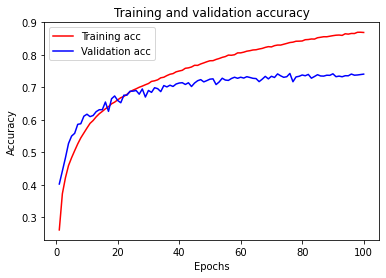

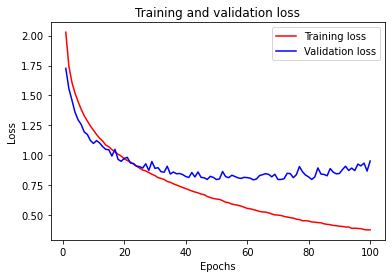

In [71]:
plots(history)

In [72]:
score = model.evaluate(testX, testY, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1]*100)


 Test accuracy: 74.08999800682068


#### Task 2.1.3 Train a ResNet

Train a residual neural network (ResNet) on the CIFAR10 training data and report the test accuracy and the training time.

The ResNet is a popular network architecture for image classification. You may find more information about how ResNet works by reading this [paper](https://arxiv.org/abs/1512.03385).


*(You may implement a resnet model or use an existing implementation. In either case, you should not use pretrained network weights.)*

In [0]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, strides=1,
                        padding="SAME", 
                        use_bias=False,
                        kernel_regularizer=keras.regularizers.l2(0.01)
                        )

class ResidualUnit(keras.layers.Layer):
    def __init__(self, filters, strides=1, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation)
        self.main_layers = [
            DefaultConv2D(filters, strides=strides),
            keras.layers.BatchNormalization(),
            self.activation,
            DefaultConv2D(filters),
            keras.layers.BatchNormalization()]
        self.skip_layers = []
        if strides > 1:
            self.skip_layers = [
                DefaultConv2D(filters, kernel_size=1, strides=strides),
                keras.layers.BatchNormalization()]

    def call(self, inputs):
        Z = inputs
        for layer in self.main_layers:
            Z = layer(Z)
        skip_Z = inputs
        for layer in self.skip_layers:
            skip_Z = layer(skip_Z)
        return self.activation(Z + skip_Z)

In [28]:
model = keras.models.Sequential()

prev_filters = 64
c = [prev_filters, 2*prev_filters, 4*prev_filters, 4*prev_filters]
model.add(DefaultConv2D(c[0], 
                        input_shape=[32, 32, 3]))
model.add(ResidualUnit(c[0], strides=1))
model.add(ResidualUnit(c[1], strides=2))
model.add(ResidualUnit(c[2], strides=2))
model.add(ResidualUnit(c[3], strides=2))
model.add(keras.layers.MaxPool2D(pool_size=(4, 4)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation="sigmoid"))


model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 32, 32, 64)        1728      
_________________________________________________________________
residual_unit_4 (ResidualUni (None, 32, 32, 64)        74240     
_________________________________________________________________
residual_unit_5 (ResidualUni (None, 16, 16, 128)       230912    
_________________________________________________________________
residual_unit_6 (ResidualUni (None, 8, 8, 256)         920576    
_________________________________________________________________
residual_unit_7 (ResidualUni (None, 4, 4, 256)         1248256   
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 1, 1, 256)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 256)              

In [29]:
%%time 
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(trainX, trainY, steps_per_epoch=100, epochs=30, batch_size=128, validation_data=(testX, testY), verbose=1)

100/100 [==============================] - 15s 150ms/step - loss: 19.1158 - accuracy: 0.3097 - val_loss: 18.9817 - val_accuracy: 0.1011
Epoch 2/30
100/100 [==============================] - 15s 145ms/step - loss: 17.4747 - accuracy: 0.4253 - val_loss: 18.2699 - val_accuracy: 0.0999
Epoch 3/30
100/100 [==============================] - 15s 145ms/step - loss: 16.2027 - accuracy: 0.4792 - val_loss: 17.4941 - val_accuracy: 0.1054
Epoch 4/30
100/100 [==============================] - 15s 153ms/step - loss: 15.0580 - accuracy: 0.5121 - val_loss: 16.0250 - val_accuracy: 0.1852
Epoch 5/30
100/100 [==============================] - 15s 147ms/step - loss: 13.8514 - accuracy: 0.5932 - val_loss: 14.0527 - val_accuracy: 0.3814
Epoch 6/30
100/100 [==============================] - 15s 146ms/step - loss: 13.0031 - accuracy: 0.5994 - val_loss: 13.0182 - val_accuracy: 0.4572
Epoch 7/30
100/100 [==============================] - 15s 146ms/step - loss: 12.2322 - accuracy: 0.6067 - val_loss: 12.2985 - val

In [31]:
score = model.evaluate(testX, testY, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1]*100)


 Test accuracy: 62.769997119903564


### Task 2.2 Fast training of ResNet

*(weight ~10%)*

In this task, you will experiment with different ways to reduce the time for training your ResNet on CIFAR10. There are different ways to speed up neural network training; below are two ideas. Please select at least one idea to implement. Explain the experiment steps and report the final performance and training time.

#### Option 1. Learning rate schedule

Use a learning rate schedule for the training. Some popular learning rate schedules include 

- the Step Decay learning rate (e.g., see [here](https://github.com/kuangliu/pytorch-cifar))
- [Cyclical learning rates](https://arxiv.org/abs/1506.01186)
- [The exponential learning rate](https://openreview.net/forum?id=rJg8TeSFDH) 

Also Keras provides [some convenient functions](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules) that you can use.


#### Option 2. Look ahead optimiser

Read [this paper](https://arxiv.org/abs/1907.08610) and implement the Lookahead optimiser.

In [0]:
# I used the OPTION 1 :  learning rate scheduler method (step decay learning rate) to implement ResNet on Cifar10 dataset
# Help from https://github.com/sukilau/Ziff-deep-learning/blob/master/3-CIFAR10-lrate/CIFAR10-lrate.ipynb


#Step decay tends to drop the learning rate according to the epochs 
#This function is taken as an augment by the Learning Sheduler method, while it returns the updated Learning Rates to the SGD optimiser i am using

def step_decay(epoch):

    lr = 0.001
    drop = 0.5
    epochs_drop = 10.0
    lr = lr * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    print('Learning rate: ', lr)
    
    return lr

In [0]:
#Custom callback by extending the base class to callbacks to record the loss history and and learning rate during the experiment

class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.lr = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.lr.append(step_decay(len(self.losses)))
        print('lr:', step_decay(len(self.losses)))

In [51]:
#ResNet model Implementation 

model = keras.models.Sequential()

prev_filters = 64
c = [prev_filters, 2*prev_filters, 4*prev_filters, 4*prev_filters]
model.add(DefaultConv2D(c[0], 
                        input_shape=[32, 32, 3]))
model.add(ResidualUnit(c[0], strides=1))
model.add(ResidualUnit(c[1], strides=2))
model.add(ResidualUnit(c[2], strides=2))
model.add(ResidualUnit(c[3], strides=2))
model.add(keras.layers.MaxPool2D(pool_size=(4, 4)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation="sigmoid"))


model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_73 (Conv2D)           (None, 32, 32, 64)        1728      
_________________________________________________________________
residual_unit_20 (ResidualUn (None, 32, 32, 64)        74240     
_________________________________________________________________
residual_unit_21 (ResidualUn (None, 16, 16, 128)       230912    
_________________________________________________________________
residual_unit_22 (ResidualUn (None, 8, 8, 256)         920576    
_________________________________________________________________
residual_unit_23 (ResidualUn (None, 4, 4, 256)         1248256   
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 1, 1, 256)         0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 256)              

In [0]:
#Setting the initial learning to 0.0 as it will changed in the step decay function

opt = keras.optimizers.SGD(learning_rate=0.0, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
#Custom callback function
loss_history = LossHistory()

#Learning Rate Scheduler function callback for dropping the learning rate into half every 10 epochs
lr_scheduler = LearningRateScheduler(step_decay)

callbacks = [loss_history, lr_scheduler]

In [57]:
%%time 

#Custom callback and the Learning Rate callback to fit the model
history = model.fit(trainX, trainY, steps_per_epoch=100, epochs=100, batch_size=32,callbacks=callbacks, validation_data=(testX, testY), verbose=1)

Learning rate:  0.001
Epoch 1/100
 99/100 [============================>.] - ETA: 0s - loss: 10.3853 - accuracy: 0.6004Learning rate:  0.001
Learning rate:  0.001
lr: 0.001
100/100 [==============================] - 8s 83ms/step - loss: 10.3815 - accuracy: 0.6006 - val_loss: 11.1883 - val_accuracy: 0.3867 - lr: 0.0010
Learning rate:  0.001
Epoch 2/100
 99/100 [============================>.] - ETA: 0s - loss: 10.0981 - accuracy: 0.5919Learning rate:  0.001
Learning rate:  0.001
lr: 0.001
100/100 [==============================] - 8s 82ms/step - loss: 10.0975 - accuracy: 0.5913 - val_loss: 10.2613 - val_accuracy: 0.4830 - lr: 0.0010
Learning rate:  0.001
Epoch 3/100
 99/100 [============================>.] - ETA: 0s - loss: 9.7852 - accuracy: 0.5751Learning rate:  0.001
Learning rate:  0.001
lr: 0.001
100/100 [==============================] - 8s 81ms/step - loss: 9.7839 - accuracy: 0.5738 - val_loss: 9.9457 - val_accuracy: 0.4801 - lr: 0.0010
Learning rate:  0.001
Epoch 4/100
 99/100 [

In [58]:
score = model.evaluate(testX, testY, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1]*100)


 Test accuracy: 73.73999953269958


### Task 2.3 Performance comparison

*(weight ~3%)*

Based on the above experiments, which method or which combination of methods result in the best accuracy with the same training time.

|Model Name  | Optimiser  | Learning Rate  | Number of Epochs   |  Test Accuracy | Training Time |
|---|---|---|---|---| ---|
|  ConvNet < 10 Layers | RMSprop  | 0.0001  | 100  | 74.08  | 9min 34s |
|  ResNet | RMSprop  | 0.0001 |  100 | 62.76  | 7min 26s| 
|  ResNet ( Fast Training ) Learning Scheduler  | SGD   | Step_decay  |  100 | 73.73  | 13min 38s |


It could be seen that the **ConvNet with less than 10 layers** gave the best results, as compared to the ResNet, however this ConvNet could further be improved by adding layers and drop out regularizations.

---
**END OF ASSIGNMENT TWO**